<a href="https://colab.research.google.com/github/Juno-Maria-Joseph/OIBSIP/blob/main/Exploratory_Data_Analysis_(EDA)_on_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA) on Retail Sales Data**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Load the Retail Sales Dataset
retail_sales_df = pd.read_csv('/content/retail_sales_dataset.csv')

In [ ]:
#Taking a look at the top 5 rows of the data
retail_sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Transaction ID: A unique identifier for each transaction, allowing tracking and reference.

Date: The date when the transaction occurred, providing insights into sales trends over time.

Customer ID: A unique identifier for each customer, enabling customer-centric analysis.

Gender: The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

Age: The age of the customer, facilitating segmentation and exploration of age-related influences.

Product Category: The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

Quantity: The number of units of the product purchased, contributing to insights on purchase volumes.

Price per Unit: The price of one unit of the product, aiding in calculations related to total spending.

Total Amount: The total monetary value of the transaction, showcasing the financial impact of each purchase.

In [ ]:
# Display basic information about the dataset
print(retail_sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [ ]:
# Display summary statistics
print(retail_sales_df.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [ ]:
retail_sales_df.shape

(1000, 9)

In [ ]:
retail_sales_df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
retail_sales_df.isnull()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [ ]:
# check for missing values
retail_sales_df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
retail_sales_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
retail_sales_df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
retail_sales_df

In [ ]:
# Let use unique get distinct values
retail_sales_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# Let's use value_counts to get count of distinct values
retail_sales_df['Gender'].value_counts()

,count
Gender,
Female,510
Male,490


In [ ]:
# Let's get age count sorted in descending order
retail_sales_df['Age'].value_counts().sort_index()

,count
Age,
18,21
19,21
20,21
21,20
22,27
23,24
24,15
25,20
26,22


In [ ]:
retail_sales_df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [ ]:
retail_sales_df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


In [ ]:
# Group by 'Product Category' and calculate relevant statistics
category_stats = retail_sales_df.groupby('Product Category').agg(
    total_quantity=('Quantity', 'sum'),           # Total quantity per product category
    avg_price_per_unit=('Price per Unit', 'mean'), # Average price per unit per product category
    total_sales=('Total Amount', 'sum')           # Total sales amount (Total Amount) per product category
)

# Display the result
print(category_stats)

                  total_quantity  avg_price_per_unit  total_sales
Product Category                                                 
Beauty                       771          184.055375       143515
Clothing                     894          174.287749       155580
Electronics                  849          181.900585       156905


In [ ]:
#seeing the date column
retail_sales_df['Date'] = pd.to_datetime(retail_sales_df['Date'])
# add 'month' column and extract month from date
retail_sales_df['month'] = retail_sales_df['Date'].dt.month_name()
retail_sales_df['month']

,month
0,November
1,February
2,January
3,May
4,May
...,...
995,May
996,November
997,October
998,December


In [ ]:
# Ensure 'Date' column is in datetime format
retail_sales_df['Date'] = pd.to_datetime(retail_sales_df['Date'])
# Extract the year and month
retail_sales_df['YearMonth'] = retail_sales_df['Date'].dt.to_period('M')
# Group by YearMonth and count the number of transactions (Transaction ID)
monthly_transactions = retail_sales_df.groupby('YearMonth')['Transaction ID'].count()
# Display the result
print(monthly_transactions)


YearMonth
2023-01     76
2023-02     85
2023-03     73
2023-04     86
2023-05    105
2023-06     77
2023-07     72
2023-08     94
2023-09     65
2023-10     96
2023-11     78
2023-12     91
2024-01      2
Freq: M, Name: Transaction ID, dtype: int64






**time series**

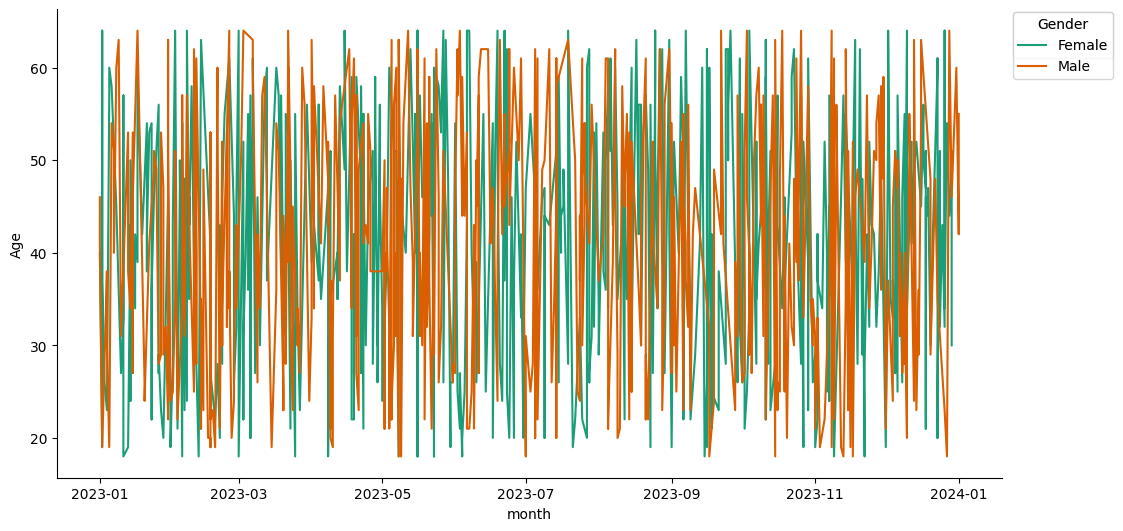

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = retail_sales_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('Age')

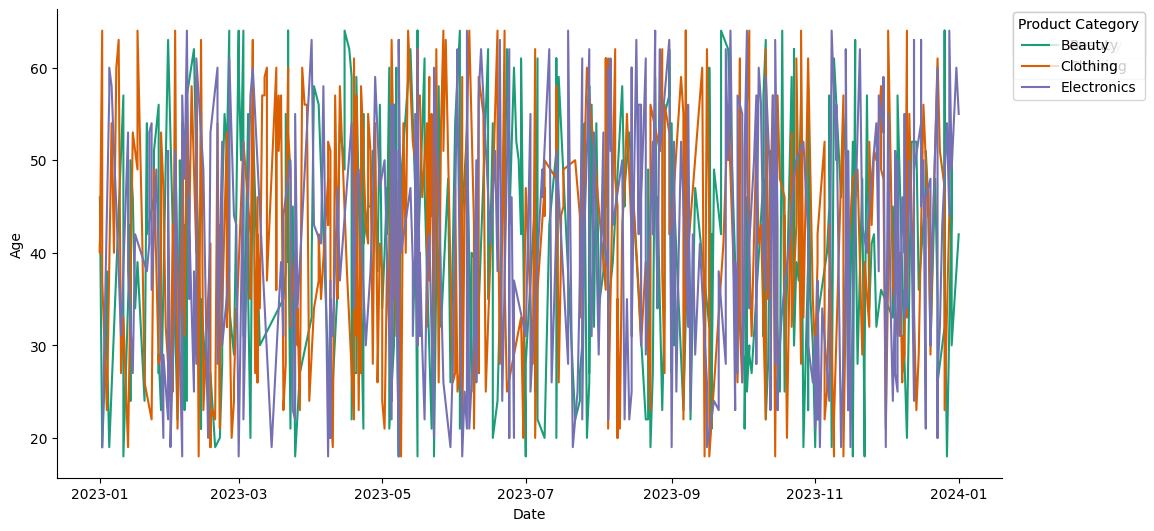

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = retail_sales_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Age')

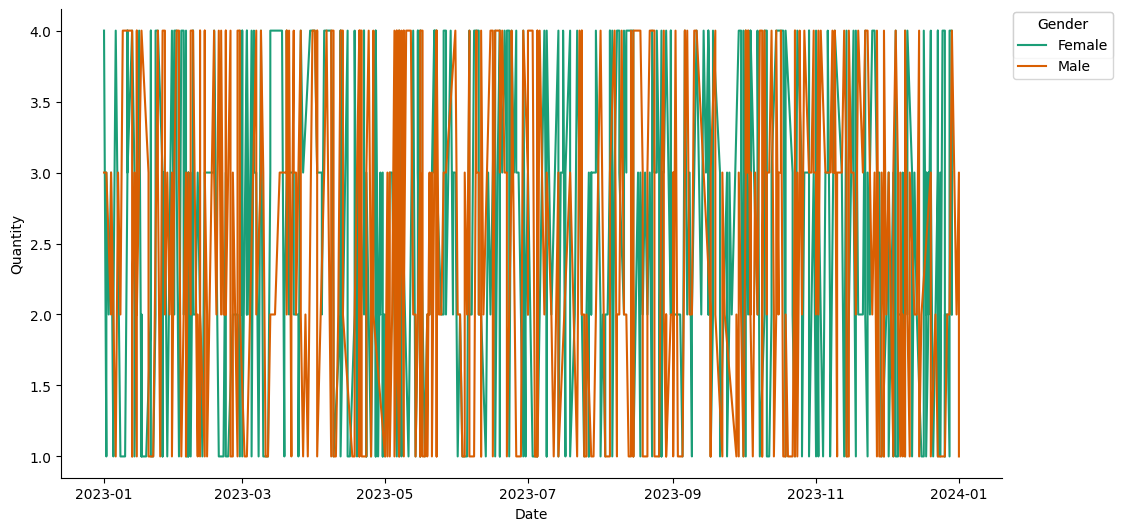

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Quantity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = retail_sales_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Quantity')

<ipython-input-23-a4c6c016bc27>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = retail_sales_df['Total Amount'].resample('M').sum()


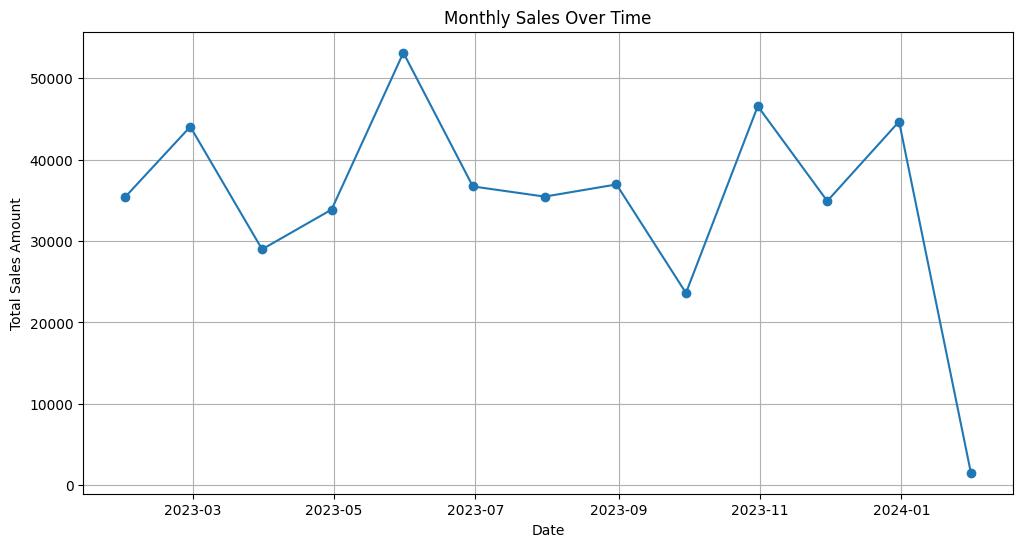

In [ ]:
# Ensure the 'Date' column is in datetime format
retail_sales_df['Date'] = pd.to_datetime(retail_sales_df['Date'])

# Set 'Date' as the index
retail_sales_df.set_index('Date', inplace=True)

# Resample data by month and sum the 'Total Amount' to get monthly sales
monthly_sales = retail_sales_df['Total Amount'].resample('M').sum()

# Plot the sales trend over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

In [ ]:
# Check the data types of all columns
print(retail_sales_df.dtypes)

Transaction ID          int64
Customer ID            object
Gender                 object
Age                     int64
Product Category       object
Quantity                int64
Price per Unit          int64
Total Amount            int64
month                  object
YearMonth           period[M]
dtype: object


**Customer and Product Analysis**

1. Analyze Purchases by Gender

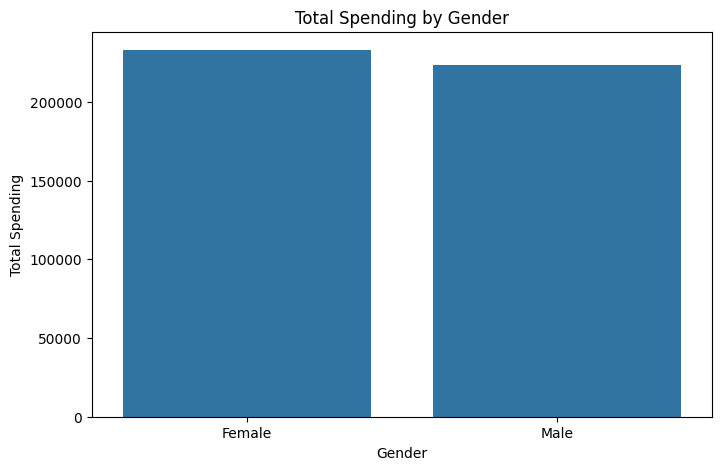

In [ ]:
# Analyze total spending by gender
gender_spending = retail_sales_df.groupby('Gender')['Total Amount'].sum().reset_index()

# Plot total spending by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Total Amount', data=gender_spending)
plt.title('Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.show()

2. Analyze Purchases by Age Group:

<ipython-input-26-56c10ef8da5d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = retail_sales_df.groupby('Age_Group')['Total Amount'].sum().reset_index()


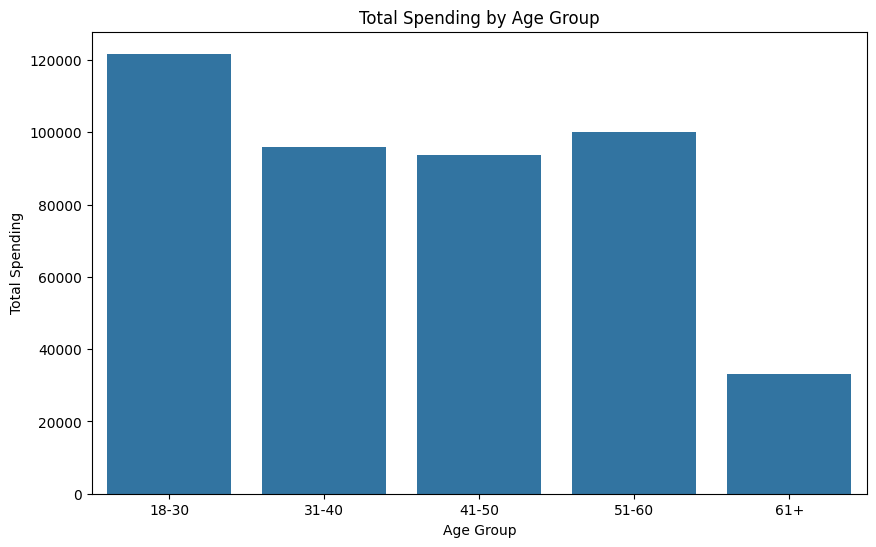

In [ ]:
# Create age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-30', '31-40', '41-50', '51-60', '61+']
retail_sales_df['Age_Group'] = pd.cut(retail_sales_df['Age'], bins=bins, labels=labels)

# Analyze total spending by age group
age_group_spending = retail_sales_df.groupby('Age_Group')['Total Amount'].sum().reset_index()

# Plot total spending by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Total Amount', data=age_group_spending)
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.show()


3. Analyze Product Preferences by Gender:

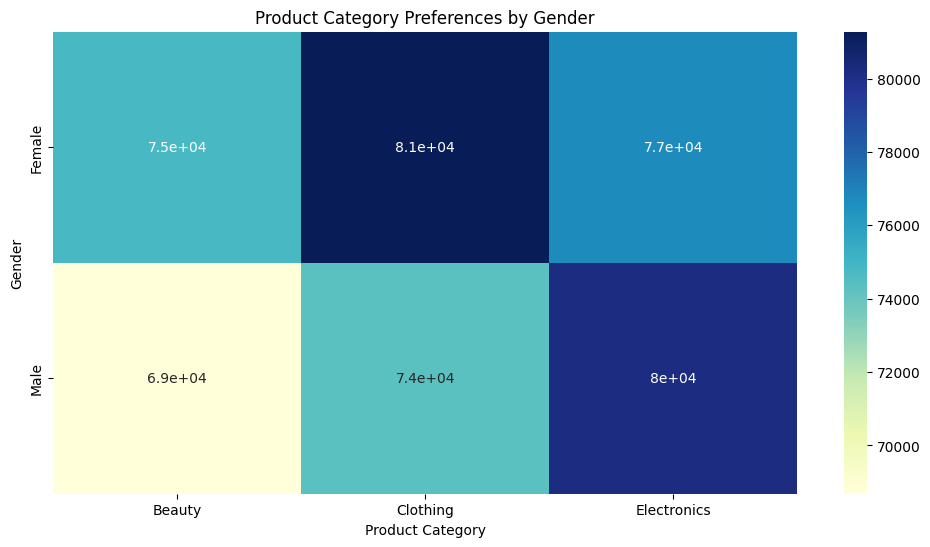

In [ ]:
# Analyze product category preferences by gender
gender_product_prefs = retail_sales_df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

# Plot heatmap for product preferences by gender
plt.figure(figsize=(12, 6))
sns.heatmap(gender_product_prefs, annot=True, cmap='YlGnBu')
plt.title('Product Category Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.show()

4. Quantity and Spending Behavior:

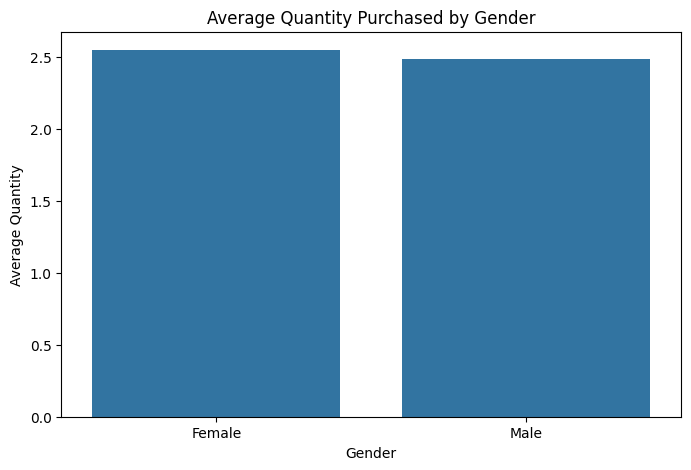

<ipython-input-28-6b6dcb13d06c>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending_avg = retail_sales_df.groupby('Age_Group')['Total Amount'].mean().reset_index()


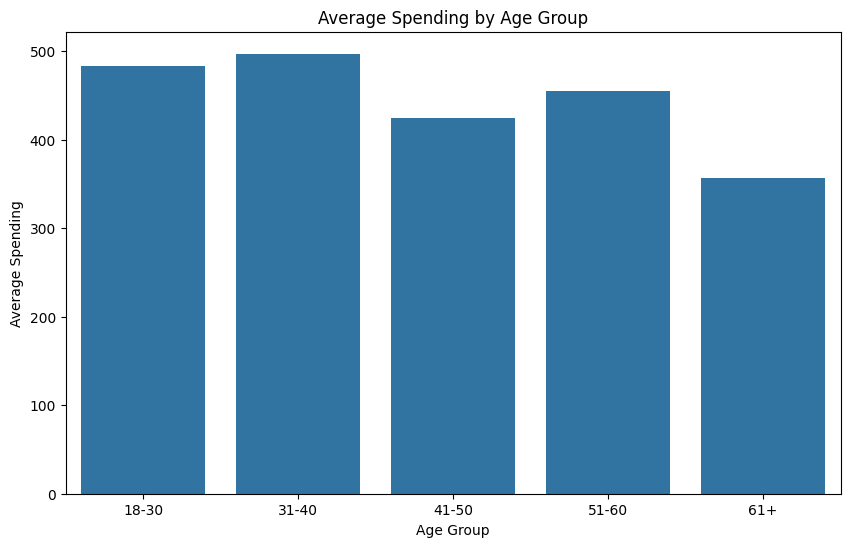

In [ ]:
# Analyze average quantity purchased by gender
gender_quantity = retail_sales_df.groupby('Gender')['Quantity'].mean().reset_index()

# Plot average quantity by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Quantity', data=gender_quantity)
plt.title('Average Quantity Purchased by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Quantity')
plt.show()

# Analyze average spending by age group
age_group_spending_avg = retail_sales_df.groupby('Age_Group')['Total Amount'].mean().reset_index()

# Plot average spending by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Total Amount', data=age_group_spending_avg)
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.show()


5. Customer Segmentation


         Total Amount  Quantity
Cluster                        
0          253.739919  1.489919
1          263.091168  3.455840
2         1554.248366  3.673203


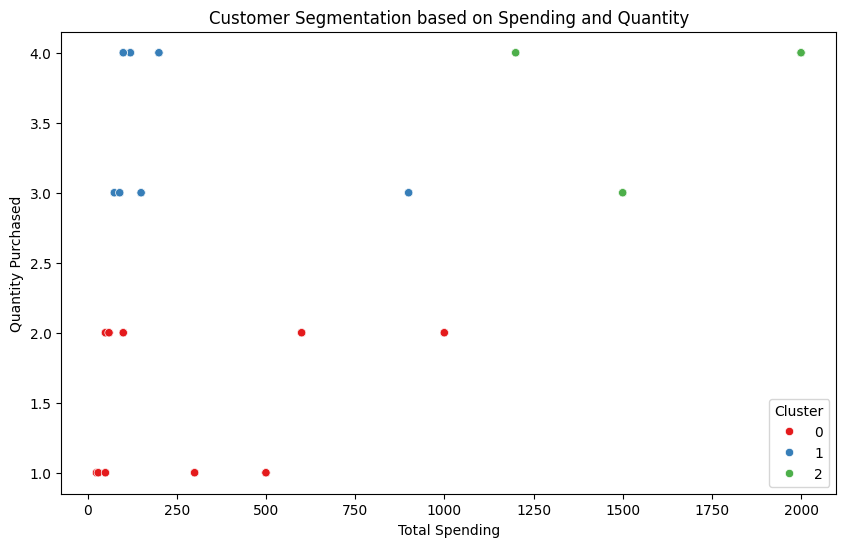

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
customer_features = retail_sales_df[['Customer ID', 'Total Amount', 'Quantity']].groupby('Customer ID').sum()

# Standardize the data
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
customer_features['Cluster'] = kmeans.fit_predict(customer_scaled)

# Analyze the clusters
print(customer_features.groupby('Cluster').mean())

# Plot the clusters based on spending and quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Amount', y='Quantity', hue='Cluster', data=customer_features, palette='Set1')
plt.title('Customer Segmentation based on Spending and Quantity')
plt.xlabel('Total Spending')
plt.ylabel('Quantity Purchased')
plt.show()

Total Sales by Product Category

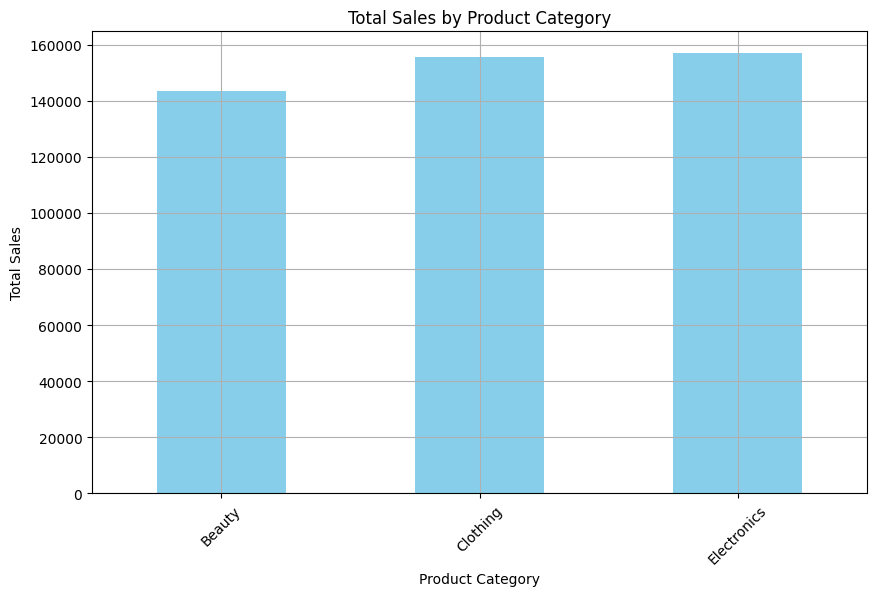

In [ ]:
import matplotlib.pyplot as plt

# Group data by Product Category and calculate total sales
category_sales = retail_sales_df.groupby('Product Category')['Total Amount'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Sales Trends Over Time (Monthly Sales)

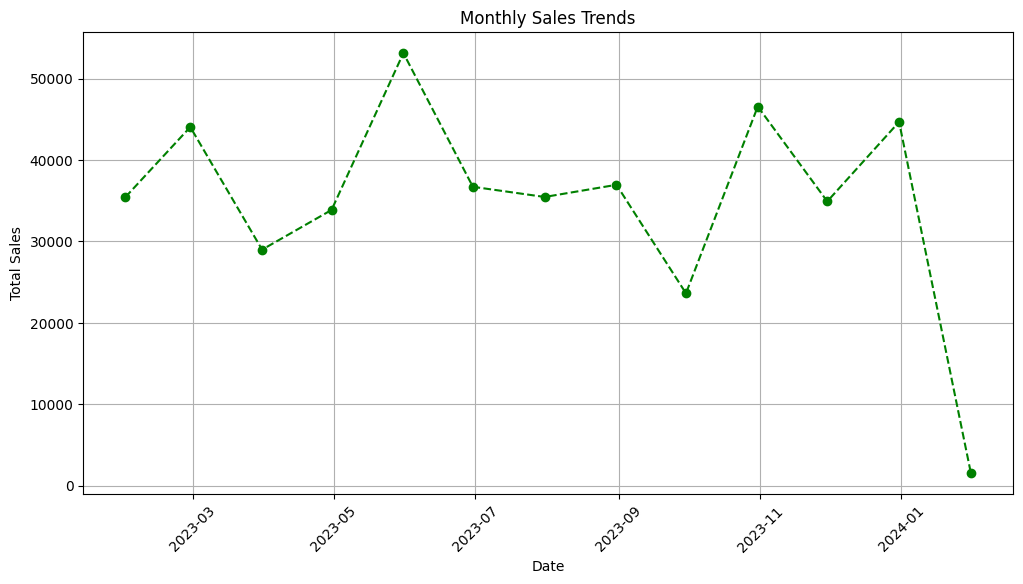

In [ ]:
# Convert the YearMonth index to datetime format
monthly_sales.index = pd.to_datetime(monthly_sales.index.astype(str))

# Create a line plot for monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='green', linestyle='--')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




Total Sales by Gender

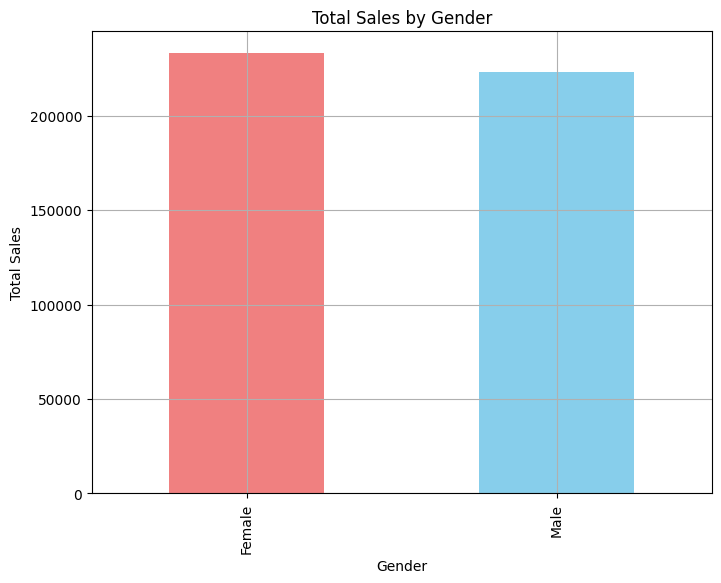

In [ ]:
# Group data by Gender and calculate total sales
gender_sales = retail_sales_df.groupby('Gender')['Total Amount'].sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
gender_sales.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


Seasonal and event-based sales trends

<Figure size 1200x800 with 0 Axes>

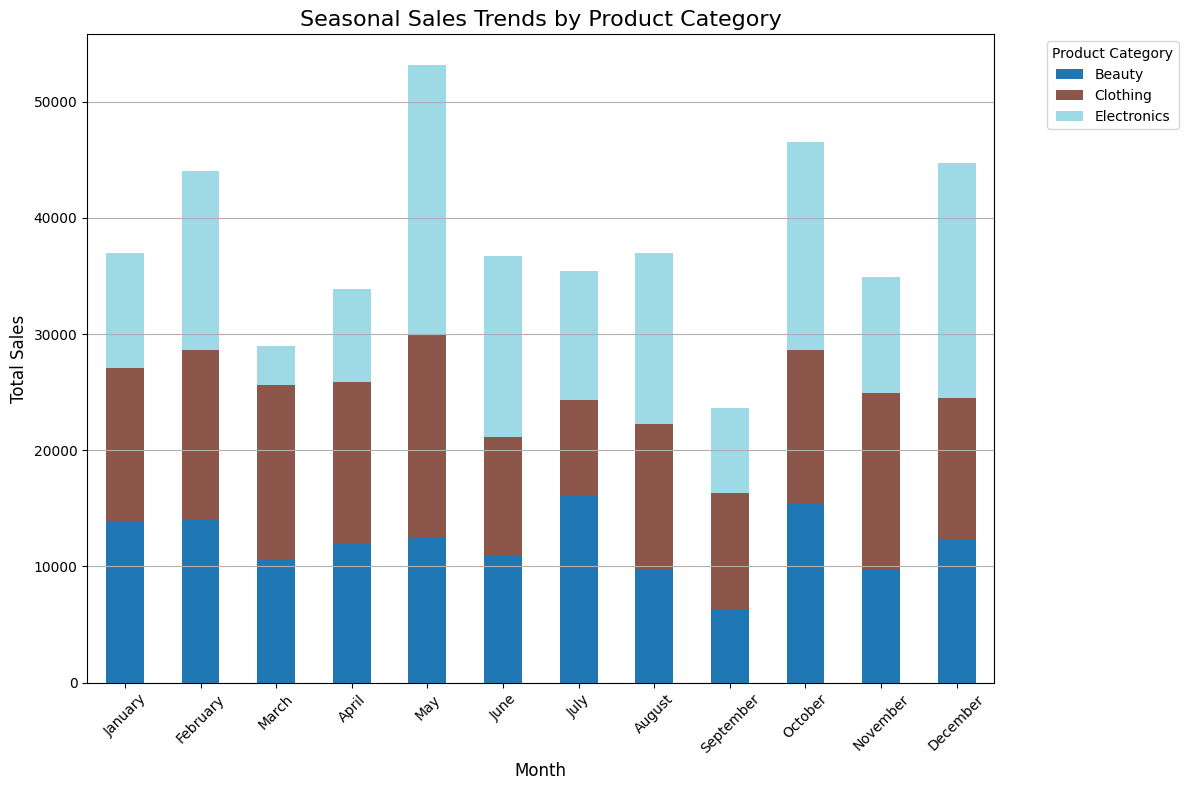

In [ ]:
# Convert 'YearMonth' from Period to Timestamp, then extract the month
retail_sales_df['Month'] = retail_sales_df['YearMonth'].dt.to_timestamp().dt.month_name()

# Group data by Product Category and Month, summing total sales for each
monthly_category_sales = retail_sales_df.groupby(['Month', 'Product Category'])['Total Amount'].sum().unstack()

# Define the correct order of months (for proper sorting in the plot)
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_category_sales = monthly_category_sales.reindex(months_order)

# Plot a stacked bar chart
plt.figure(figsize=(12, 8))
monthly_category_sales.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 8))

# Customization
plt.title('Seasonal Sales Trends by Product Category', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# Show legend and plot
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Sales by Product Category and Month

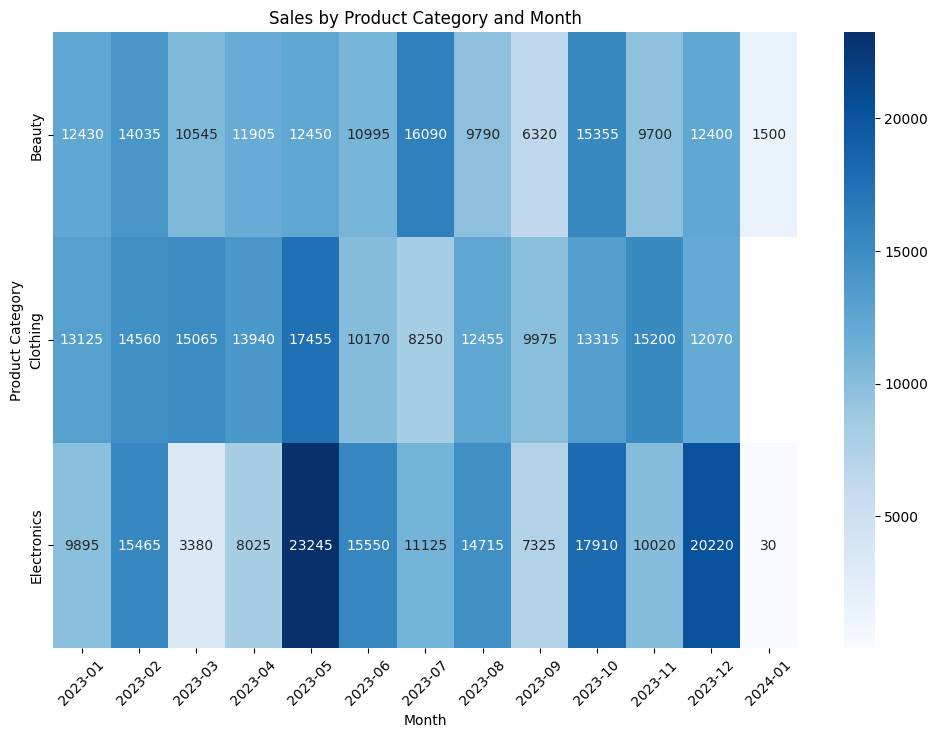

In [ ]:
import seaborn as sns

# Pivot table: total sales by Product Category and YearMonth
category_month_sales = retail_sales_df.pivot_table(index='Product Category', columns='YearMonth', values='Total Amount', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(category_month_sales, annot=True, fmt='.0f', cmap='Blues')
plt.title('Sales by Product Category and Month')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.xticks(rotation=45)
plt.show()
